ChatGPT - [link](https://chatgpt.com/share/3942fa33-dc33-4ea4-8c4a-4df6698a4996)

## 0. Computer Vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision.
* `torchvision.datasets` - get datasets and data loading functions for computer vision here.
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.tranforms` - functions for manipulating your vision data (images) to be suitable for use with an ML data.
* `torch.utils.data.Dataset` - base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset.  


In [ ]:
# Import PyTorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader as DataLoader

# Import torchvision
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
from matplotlib import pyplot as plt

# CHeck version
print(torch.__version__)
print(torchvision.__version__)

2.4.0+cu121
0.19.0+cu121


## 1. Getting a dataset

The dataset we will be using is [FashionMNIST](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html) from `torchvision.datasets`.

In [ ]:
# Set up training data
train_data = datasets.FashionMNIST(
  root='data', # where to download the data to?
  train=True, # do we want the training data?
  download=True, # do we want to download the data?
  transform=torchvision.transforms.ToTensor(), # how do we want to trannsform the data
  target_transform=None # how do we want to transform the labels/targets?, it can be allowed to have functions that return One Hot Encoded vector, Integer label, String Label, Normalised label
)

test_data = datasets.FashionMNIST(
  root='data', # where to download the data to?
  train=False, # do we want the training data?
  download=True, # do we want to download the data?
  transform=torchvision.transforms.ToTensor(), # how do we want to trannsform the data
  target_transform=None # how do we want to transform the labels/targets?, it can be allowed to have functions that return One Hot Encoded vector, Integer label, String Label, Normalised label
)

test_data.classes, test_data.targets

100%|██████████| 26421880/26421880 [00:02<00:00, 12769800.34it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 192621.40it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3538605.59it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18857883.84it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 tensor([9, 2, 1,  ..., 8, 1, 5]))

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image, label = train_data[0]
image, label, image.shape

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# To obtain a dictionary of all the classes, we do:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channel, width, height]") # 1 color channel becuase it is black and white image..
print(f"Image label; {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channel, width, height]
Image label; Ankle boot


### 1.2 Visualizing images
With PyTorch, we use `[batch_size, color_channels, width, height]`

But with other libraries, like **matplotlib**, when we want to visualize data or even otherwise, we use `[batch_size, width, height, color_channels]`

Image shape: torch.Size([1, 28, 28])
Image Label: Ankle boot


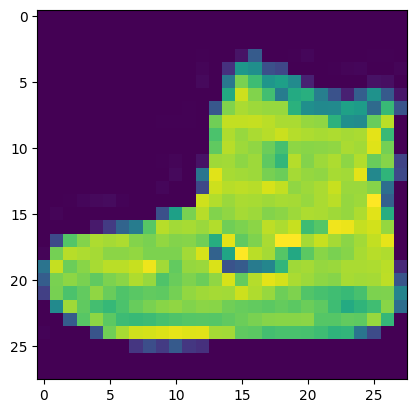

In [ ]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
print(f"Image Label: {class_names[label]}")
plt.imshow(image.squeeze())

# plt.imshow(image) # will give error of invalid shape as matplotlib does not accept color channels. If at all it does, then the color channel must be in the last

Text(0.5, 1.0, 'Ankle boot')

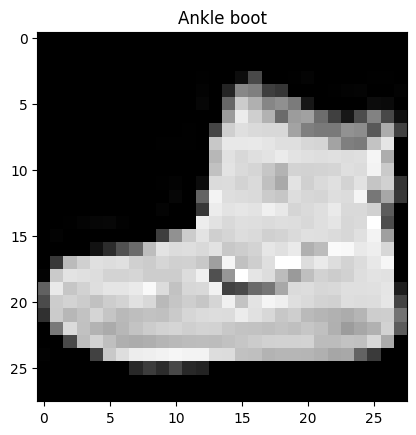

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

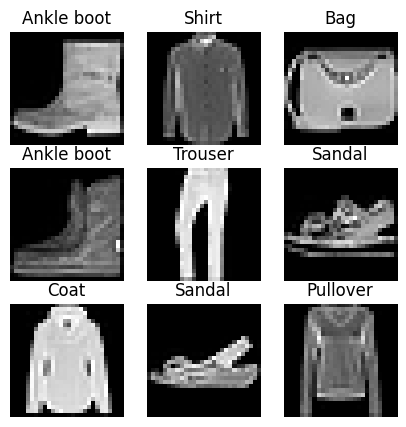

In [ ]:
# Plot some more images

torch.manual_seed(42)
# the figure will be 9 inches wide and 9 inches tall
fig = plt.figure(figsize=(5, 5))
rows, cols = 3, 3
for i in range(1, rows * cols + 1):
  #size=[1]: This specifies the shape of the output tensor. Here, size=[1] means that the function will return a tensor of size = 1.

  #.item(): This method is used to extract the value from a tensor that contains a single element and return it as a standard Python scalar (e.g., an int or float).

  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

Right now, our model is in the form of PyTorch Datasets.

DataLoader turns a tensor into a python iterable. Thus, `DataLoader` helps break the data into smaller batches.

Instead of manually handling the dataset and splitting it into batches, DataLoader automates the process of retrieving batches for each training iteration.

With the **`num_workers`** parameter, DataLoader allows loading data in parallel using multiple CPU threads to make the data loading process faster.

Why would we do this though?

1. It is more computationally efficient as in your computing hardware may not be able to look at 60K image in one hit. So we break it down to 32 images at a time.
2. It gives our neural network more chances to update its gradients per epoch.

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
# Dataloader for training data

# Set the batch size hyperparameter
BATCH_SIZE=32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

# Dataloader for training data
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79f7fa9e8e50>,
 <torch.utils.data.dataloader.DataLoader at 0x79f7fa9e8190>)

In [ ]:
# Let's check out what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x79f7fa9e8e50>, <torch.utils.data.dataloader.DataLoader object at 0x79f7fa9e8190>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [ ]:
# Check out what's happening inside the training dataloader
train_features_batch, train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

1. **iter()**:
This function is **used to create an iterator from an iterable object**.
In this case, `train_dataloader` is an iterable, which means it can be looped over, but to manually access its elements one by one, you need an iterator.
By calling iter(train_dataloader), you're creating an iterator that can be used to retrieve batches of data from the `train_dataloader`.
It essentially "prepares" the iterable(e.g., a list, DataLoader, or any object that supports iteration) to be iterated over.

2. **next()**:
This function is used to get the next item from an iterator.
When you call `next()` on an iterator, it retrieves the next batch of data from the train_dataloader.
After the first call, the iterator moves to the next batch, so **subsequent calls to `next()` will return the following batches until the iterator is exhausted**.
The `next()` function is used to fetch the next element from the iterator created by `iter()`.
Every time you call `next()`, it returns the next item in the sequence.


Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


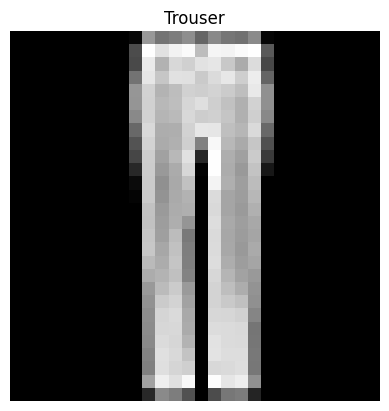

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.title(f"{class_names[label]}")
plt.axis(False)
plt.imshow(img.squeeze(), cmap="gray")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline  model

When starting to build a series of machine learning modelling experiments, it is best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words, start simply and add complexity when necessary.

**Flattening** helps to condense information down into a single vector space.

Our basemodel will be a linear model, which can not handle multi-dimensional data. So, we want it to have a single vector.

Thus, **`Flatten()`** layer reduces all dimensions except the batch size into a single dimension (a flat vector). This is important because fully connected layers expect 2D inputs: batch size and features.

* Input shape: `[batch_size, channels, height, width]`
* Output shape after `nn.Flatten()`: `[batch_size, channels * height * width]`


In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
# x.shape() # Output: torch.Size([1, 28, 28])

# Flatten the sample
output = flatten_model(x) # perform the forward pass

# Print out wht happneded
print(f"Shape before flattening: {x.shape}") # [color_channels, height, width]
print(f"Shape after flattening: {output.shape}") # [color_channels, height*width]

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0039, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0510, 0.1451, 0.4118, 0.0118, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0902, 0.1843, 0.4706, 0.4353, 0.2588, 0.1843, 0.3490, 0.1333,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1843, 0.3765, 0.6118,
        0.5725, 0.6745, 0.5882, 0.4471, 0.4314, 0.3608, 0.0980, 0.0000, 0.3765,
        0.3882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.1451, 0.1608, 0.0863, 0.5373, 0.4235,
        0.4157, 0.2784, 0.3059, 0.2588, 0.1216, 0.0078, 0.0000, 0.0000, 0.0000,
        0.0000, 0.4000, 0.0000, 0.0000, 

In [ ]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# Setup model with  input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # 1*28*28 = 784
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
# dummy_data
dummy_x = torch.rand([1, 28, 28])
model_0(dummy_x) # thus, we want 1 logit per class

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we are working with multi-class data, we will use `nn.CrossEntropyLoss()`
* Optimizer - `torch.optim.SDG()`
* Evaluation Metric - `torchmetrics.Accuracy()`, `torchmetrics.ConfusionMatrix()`

In [ ]:
# Calculate th accuracy
# def accuracy_fn(y_true, y_preds):
#   correct = torch.eq(y_true, y_preds).sum().item()
#   acc = (correct / len(y_preds))
#   return acc


# OR download from helper function

import requests
from pathlib import Path

# Download helper functions from repo
if Path('helper_functions.py').is_file():
  print(f"helper_functions.py already exists, skiping download...")
else:
  print(f"Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# Import the accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)

### 3.2 Creating a function to time our experiments

ML is very experimental. We might often might to track:
1. Model's performance (loss and accuarcy values, etc.)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """ Prints the difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
# some code
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


2.6657999995904902e-05

### 3.3 Creating a training loop and training our model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print all out.
5. Time it all.

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm # .auto is going to recognize what computing environment we are using and it is going to give us the progress bar accordingly

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

# Create training & test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")

  # Training
  train_loss = 0

  # Add a loop to loop through the training  batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate the training loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss Backward (Backpropagation)
    loss.backward()

    # 5. Optimizer step (Gradient Descent)
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      # len(X) is the batch size, i.e, 32
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length pf train dataloader
  # len(train_dataloader) = no. of batches
  train_loss /= len(train_dataloader)


  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate the loss
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      # Accuracy function expects our true labels and predictions to be in the same format. Since our model gives logits as values, we use argmax to return the logit value with the highest index
      test_acc += accuracy_fn(y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the average per batch test loss
    test_loss /= len(test_dataloader)

    # Calculate the average per batch test acc
    test_acc /= len(test_dataloader)

  # Print out what is happening
  print(f"\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

# Calculate the training timie
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.5904 | Test Loss: 0.5095 | Test Accuracy: 82.0387
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.4763 | Test Loss: 0.4799 | Test Accuracy: 83.1969
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.4550 | Test Loss: 0.4766 | Test Accuracy: 83.4265
Train time on cpu: 34.292 seconds


## 4. Make predictions and get Model 0 results


Explanation of argmax(dim=1):

1. **Model Output:** In a multi-class classification problem, a model (like a neural network) outputs a tensor of shape [batch_size, num_classes]. Each row corresponds to a different sample in the batch, and each column corresponds to the predicted score or probability for each class.

2. **Purpose of argmax(dim=1):** The argmax(dim=1) function is called on the model output tensor to find the index of the highest score (or probability) for each sample in the batch.
This index corresponds to the predicted class label for that sample.

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model_0,
                             test_dataloader,
                             loss_fn,
                             accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. Setup a device agnostic-code(for using a GPU, if there is one)

In [ ]:
!nvidia-smi

Wed Sep 18 07:42:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

In [ ]:
# Create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.network_layer = nn.Sequential(
        nn.Flatten(), # Flattens input into a single vector
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.network_layer(x)

In [ ]:
torch.manual_seed(42)

# Setup model with  input parameters
model_1 = FashionMNISTModelV1(
    input_shape=784, # 1*28*28 = 784
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to(device)

model_1

FashionMNISTModelV1(
  (network_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss function, optimizer, and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops


Let's create a fuction for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
    """Performs a training step with model trying to learn on data_loader."""
    train_loss, train_acc = 0, 0
    model.train()  # Put the model in training mode

    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)  # Put the data on the target device

        # 1. Forward pass
        y_preds = model(X)

        # 2. Calculate the loss and accuracy
        loss = loss_fn(y_preds, y)
        train_loss += loss.item()
        train_acc += accuracy_fn(y, y_preds.argmax(dim=1))

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Backpropagation
        loss.backward()  # Removed retain_graph=True

        # 5. Gradient Descent
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
    """Performs a testing loop step on model going over data_loader."""
    test_loss, test_acc = 0, 0
    model.eval()  # Put the model in eval mode

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate the loss
            test_loss += loss_fn(test_pred, y).item()

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

    print(f"Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")


In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Measure time
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create an optimization and evaluation loop
for epoch in tqdm(range(epochs)):
    print(f"\nEpoch: {epoch}\n--------")

    # Training step
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    # Testing step (evaluation)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
--------
Train Loss: 1.09199 | Train Accuracy: 61.34%
Test Loss: 0.95637 | Test Accuracy: 65.00%

Epoch: 1
--------
Train Loss: 0.78101 | Train Accuracy: 71.93%
Test Loss: 0.72227 | Test Accuracy: 73.91%

Epoch: 2
--------
Train Loss: 0.67027 | Train Accuracy: 75.94%
Test Loss: 0.68500 | Test Accuracy: 75.02%
Train time on cuda: 32.452 seconds


In [ ]:
total_train_time_model_0, model_0_results

(34.292277661,
 {'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.47663888335227966,
  'model_acc': 83.42651757188499})

In [ ]:
# Get model 1 dictionary
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when
          "model_loss": loss.item(),
          "model_acc": acc}

model_1_results = eval_model(model_1,
                            test_dataloader,
                            loss_fn,
                            accuracy_fn,
                            device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 7. Model 2: Building a Convolutional Neural Network

CNN's are also known as **ConvNets**.

CNN's are known for their capabilites to find patterns in visual data.

Working demo in detail - [link text](https://poloclub.github.io/cnn-explainer/)

Layers type:

1. **Input image(s):** Target images in which you would like to discover the pattern in.

2. **Input Layer:** Taken in target images and preprocesses them for further layers.

3. **Convolution Layer:** Extract the most important features from target images -> `torch.nn.ConvXd()` [X can be multiple values].

4. **Hidden activation:** Adds non-linearity to the learned features -> `torch.nn.ReLU()`

5. **Pooling Layer:** Reduces the dimensionality of learned image features -> `torch.nn.MaxPool2d()` [max] and `torch.nn.AvgPool2d()` [average]

6. **Output Layer:** Takes learned features and outputs them in shape of target labels -> `torch.nn.Linear(out_features=[number_of_classes])`

7. **Output Activation:** Converts output logits to prediction probabilities -> **`torch.sigmoid()`**[binary classification] or **`torch.softmax()`** [multi-class classification]

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG model from CNN explainer website. In TinyVGG, the stride is of value 1. VGG, ResNet are the types of Convolutional Neural Networks.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, # or (3, 3) can be written
                  stride=1,
                  padding=1), # values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # or (3, 3) can be written
                  stride=1,
                  padding=1), # values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
       nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, # or (3, 3) can be written
                  stride=1,
                  padding=1), # vallues we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=output_shape,
                  kernel_size=3, # or (3, 3) can be written
                  stride=1,
                  padding=1), # vallues we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7,
                out_features=output_shape)
    )
# Print the output shape after each conv layer so as to evaluate the in_features after flattening in the classifier layer
  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # since we have black and white images, color channel is 1
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

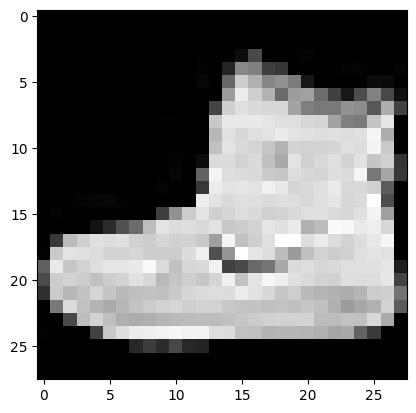

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

 ### 7.1 Stepping through `nn.Conv2d`

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

### **Note:** Bigger the kernel size, lesser will be the output of the conv2d layer.

Increasing the padding will result in lower loss of information around the corners of the image and the output shape, may or may not be maintained as the input image.

In [ ]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, # in_channel is the same number of color channels as our images
                       out_channels=10, # equivalent to the no. of hidden units we have
                       kernel_size=(3, 3),
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping through `nn.MaxPool2d()`

Tries to learn the most important features of an image

In [ ]:
# Print out the test image shape
print(f"Original test image shape: {test_image.shape}")

# Create a sample nn.MaxPool2d()
max_pool_layer = nn.MaxPool2d(kernel_size=2) # kernel_size = 2 -> Output decreases by half

# Pass data through the conv layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Original test image shape: torch.Size([3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([10, 31, 31])


### 7.3 Setup aloss function and an optimize

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

### 7.4 Training nd testing `model_2` using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"\nEpoch: {epoch}\n-------")
  train_step(model_2,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)
  test_step(model_2,
             train_dataloader,
             loss_fn,
             accuracy_fn,
             device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(train_time_start_model_2, train_time_end_model_2, device)

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
-------
Train Loss: 0.59595 | Train Accuracy: 78.30%
Test Loss: 0.36682 | Test Accuracy: 86.84%

Epoch: 1
-------
Train Loss: 0.35625 | Train Accuracy: 87.07%
Test Loss: 0.37212 | Test Accuracy: 87.12%

Epoch: 2
-------
Train Loss: 0.32056 | Train Accuracy: 88.53%
Test Loss: 0.29989 | Test Accuracy: 89.16%
Train time on cuda: 58.220 seconds


In [ ]:
# Get model_2 results
model_2_results = eval_model(model_2,
                             test_dataloader,
                             loss_fn,
                             accuracy_fn,
                             device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33104681968688965,
 'model_acc': 88.19888178913737}

## 8. Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
# Adding traiing time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                 total_train_time_model_1,
                                 total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,34.292278
1,FashionMNISTModelV1,0.685001,75.019968,32.451635
2,FashionMNISTModelV2,0.331047,88.198882,58.219508


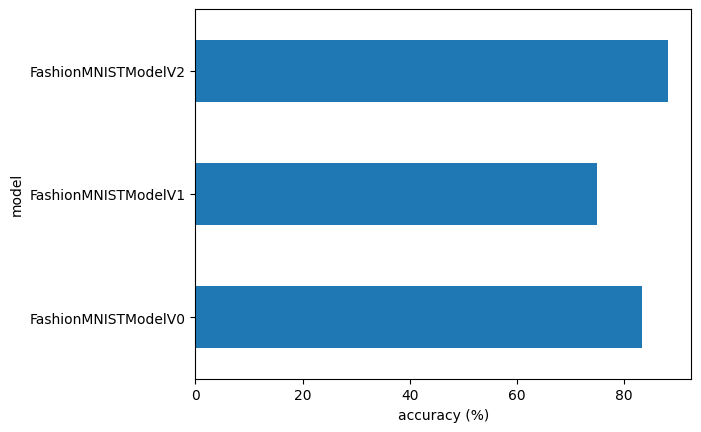

In [ ]:
# Visualize our model resullts
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

### So, the best model so far is FashionMNISTModelV2

## 9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      # Forward pass
      pred_logit = model(sample)

      # Get the prediction probability(logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

      # Get pred_prob off the GPU for futher calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs in a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

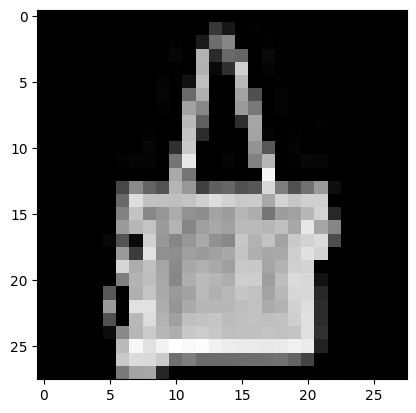

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")

In [ ]:
# Make predictions
pred_probs = make_predictions(model_2, test_samples)


# View the first two prediciton probabilities
pred_probs[:2]

tensor([[3.4144e-05, 3.9026e-06, 2.5132e-04, 4.3384e-03, 5.2787e-04, 4.5207e-04,
         8.6569e-05, 1.5672e-04, 9.9414e-01, 4.1672e-06],
        [1.7434e-07, 5.5557e-08, 2.1628e-07, 5.9334e-09, 4.6289e-08, 9.9960e-01,
         1.3866e-07, 1.6620e-05, 2.9003e-05, 3.5601e-04]])

In [ ]:
## Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([8, 5, 8, 6, 4, 9, 1, 8, 9])

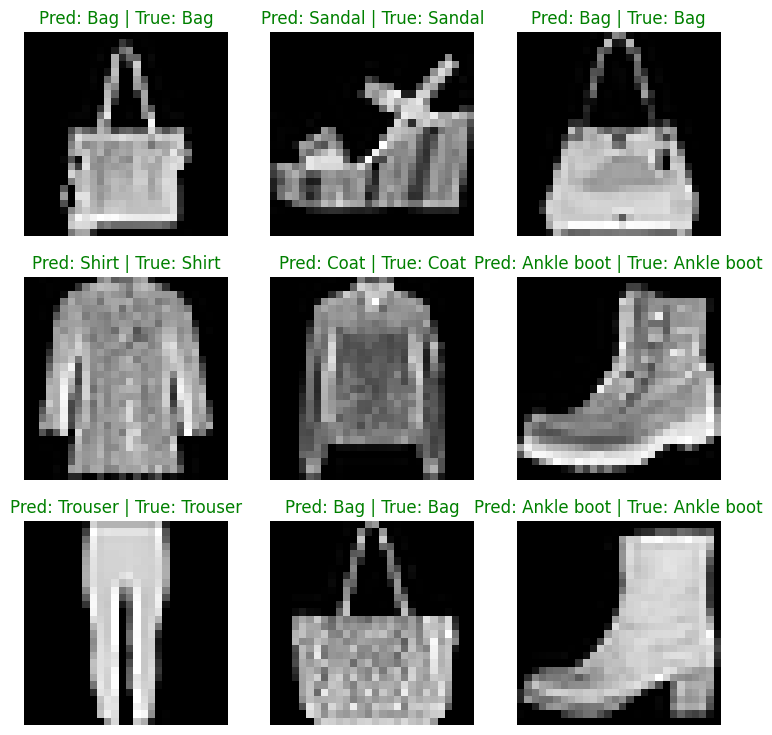

In [ ]:
# Plot Predictions
plt.figure(figsize=(9, 9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]
  if pred_label == truth_label:
    color = "green"
  else:
    color = "red"
  plt.title(f"Pred: {pred_label} | True: {truth_label}", color=color)
  plt.axis(False);

## 10. Making a confusion matrix  

A confusion matrix is a fantastic way of evaluating your classification models visually.

1. ake prediction with our modelon the test dataset
2. Make a confusion matrix `torch.ConfusionMatrix`
3. Plot the conusionmatrix using `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data to the target device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_logit = model_2(X)
    # Convert logits to predictions
    y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_preds_tensor = torch.cat(y_preds)
y_preds_tensor[:10]

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
len(y_preds_tensor)

10000

In [ ]:
# See if required packages are installed and if not, install them...
try:
    import mlxtend
    import torchmetrics
    print(f"mlxtend version: {mlxtend.__version__}")

    # Ensure mlxtend version is at least 0.19.0
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version must be at least 0.19.0"

except (ImportError, AssertionError) as e:
    print(f"Error: {e}. Installing required packages...")

    # Install required packages
    !pip install -q torchmetrics -U mlxtend

    # Import the packages after installation
    import torchmetrics
    import mlxtend
    print(f"mlxtend version after installation: {mlxtend.__version__}")


Error: No module named 'torchmetrics'. Installing required packages...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 20.1 MB/s eta 0:00:00
mlxtend version after installation: 0.23.1


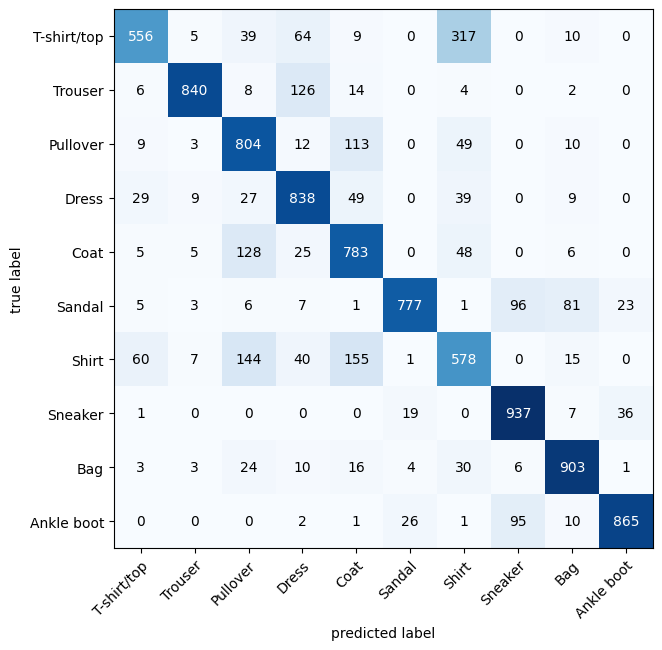

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 1. Setup the confusion matrix instance
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")

# 2. Compute the confusion matrix by comparing predictions to actual targets
confmat_tensor = confmat(preds=y_preds_tensor, target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),  # Convert the confusion matrix tensor to a NumPy array since matplotlib works with numpy
    figsize=(10, 7),                  # Set the figure size for the plot
    class_names=class_names,          # Labels for the x and y axis (class names)
)

# 4. Display the confusion matrix plot
plt.show()

## 11. Save and load best prforming model

In [ ]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to target device
loaded_model_2.to(device)

<ipython-input-66-802a709a71d5>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33104681968688965,
 'model_acc': 88.19888178913737}

In [ ]:
# Evaluate the loaded model
# The results must be save as model_2_results
torch.manual_seed(42)

loaded_model_2_results = eval_model(loaded_model_2,
                                    test_dataloader,
                                    loss_fn,
                                    accuracy_fn,
                                    device)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33104681968688965,
 'model_acc': 88.19888178913737}

In [ ]:
# Chck if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08) # absolute taulerence level, makes sure our results are same upto 8 decimal place

tensor(True)